#### why we use PCA ?
- Reduce(Remove) the Correlation between features
- Dimensionality Reduction ( Reduce the number of features ) --> (Eliminate non principal data)

In [99]:
from plotnine import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [55]:
# Here we are using inbuilt dataset [load_breast_cancer]
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x = cancer['data']
y = cancer['target']

# creating dataframe
x = pd.DataFrame(x, columns = cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
# must scaling data before using [PCA] then convert it to dataframe:
z = StandardScaler()
x_scaled = z.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [57]:
x_scaled.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

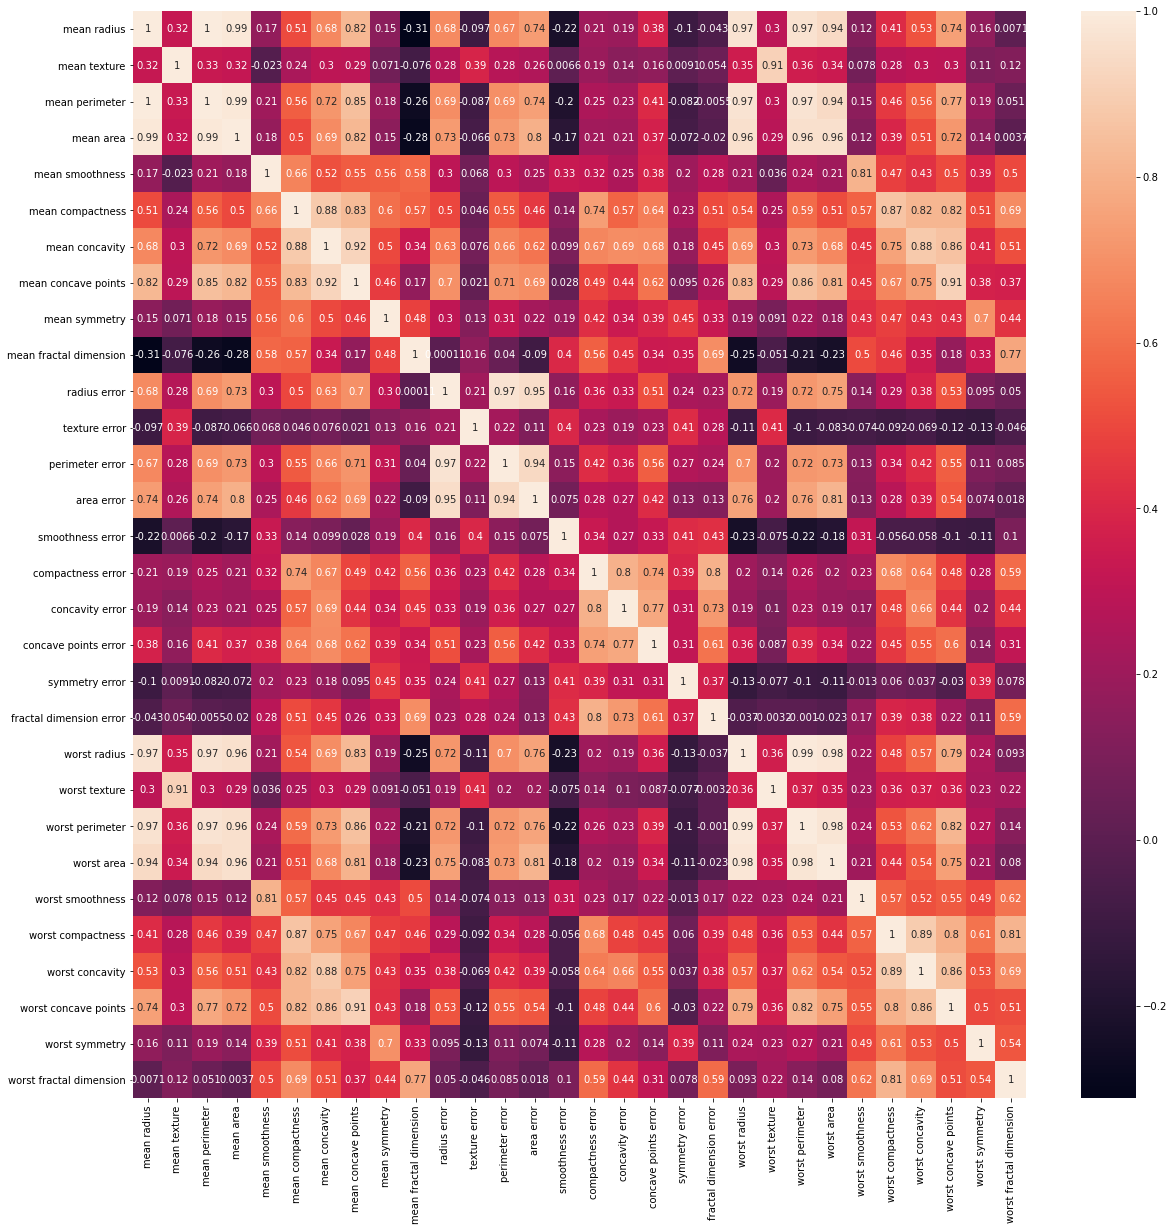

In [58]:
# get correlation before using [PCA], we see some features have high correlation:
plt.figure(figsize = (20,20))
sns.heatmap(x_scaled.corr(), annot = True)
plt.show()

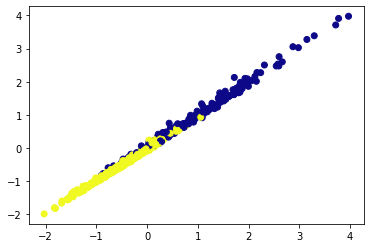

In [59]:
# plot the highest two fetures correlation:
plt.scatter(x_scaled['mean radius'], x_scaled['mean perimeter'], c = y, cmap ='plasma')
plt.show()

In [60]:
pca = PCA()
pca.fit(x_scaled)
pca.explained_variance_ratio_         

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [61]:
for i in pca.explained_variance_ratio_:
    if i <= 0.01:
        print(f'{i}: is True')
    else:
        print(f'{i}: is False')
                                       # then [9.79718988e-03] ==> is the first k <= 0.01 when k = 11 --> [n_component = 11]

0.4427202560752632: is False
0.18971182044033083: is False
0.09393163257431383: is False
0.06602134915470159: is False
0.0549576849234628: is False
0.040245220398833464: is False
0.022507337129825136: is False
0.015887238000213275: is False
0.013896493745591106: is False
0.011689781894131505: is False
0.009797189875980194: is True
0.008705379007378843: is True
0.008045249871967322: is True
0.0052336574549263605: is True
0.0031378321676273973: is True
0.0026620933651523146: is True
0.001979967925324268: is True
0.0017539594502263612: is True
0.0016492530592251639: is True
0.0010386467483387049: is True
0.0009990964637002515: is True
0.0009146467510543461: is True
0.000811361258899108: is True
0.0006018335666716721: is True
0.0005160423791651873: is True
0.000272587995477501: is True
0.00023001546250596416: is True
5.297792903809434e-05: is True
2.496010324687647e-05: is True
4.434827427366925e-06: is True


In [62]:
pcaDF = pd.DataFrame({"k": range(1,31),"variance_ratio" : pca.explained_variance_ratio_,  "cum_variance_ratio": pca.explained_variance_ratio_.cumsum()})
pcaDF               
                            # here when variance_ratio <= 0.01 then [k = 11]
                            # [cum_variance_ratio] 
                            # so the k = 11, is number of features which we need to be n_components which pca used to Dimensionality Reduction

,k,variance_ratio,cum_variance_ratio
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343
5,6,0.040245,0.887588
6,7,0.022507,0.910095
7,8,0.015887,0.925983
8,9,0.013896,0.939879
9,10,0.011690,0.951569


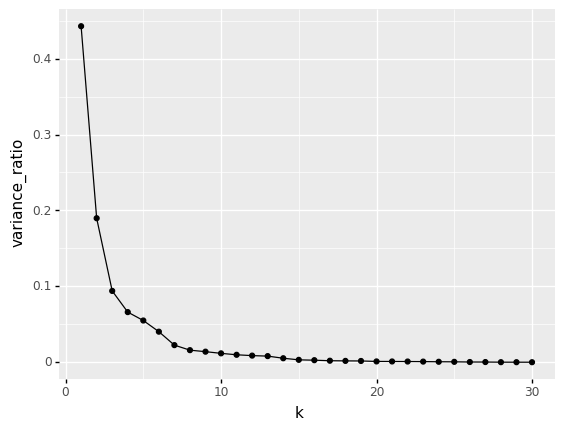

<ggplot: (88807827336)>

In [63]:
# Elbow Method:
(ggplot(pcaDF, aes(x = "k", y = "variance_ratio")) + geom_line() + geom_point())
            # from graph, the first returned k achive that variance_ratio be less than '0.01' is [k = 11]

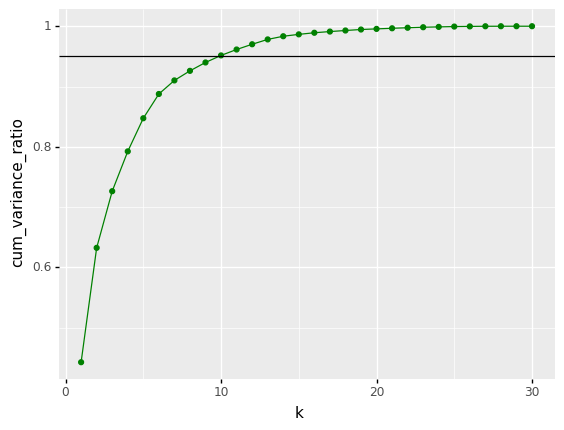

<ggplot: (88807759312)>

In [64]:
# from graph, the returned k achive that cum_variance_ratio be = '1' is [k = 13]
(ggplot(pcaDF, aes(x = "k", y = "cum_variance_ratio")) + geom_line(color = "green") +
 geom_point(color = "green") + geom_hline(yintercept = 0.95)) 

In [65]:
# so we use (n_components = 11):

pca = PCA(n_components = 11)
df_pca = pca.fit_transform(x_scaled)        # fit & transform in one command

In [66]:
# convert 'df_pca' from [array] to [Dataframe]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398404,-0.157116,-0.877395,0.262974
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711904,1.106993,0.813120
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097375,0.024067,0.454277,-0.605599
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405439,-1.116975,-1.151512
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263807,0.377703,0.651354


In [67]:
# apply the same model before pca & after pca and must be the same performance(score):

# when make model at all data before pca 
lr = LogisticRegression()
lr.fit(x_scaled, y)
print("Accuracy before pca: ", lr.score(x_scaled, y))

# when make model after dimensionality reduction (after pca)
lr2 = LogisticRegression()
lr2.fit(df_pca, y)
print("Accuracy after pca: ", lr2.score(df_pca, y))


Accuracy before pca:  0.9876977152899824
Accuracy after pca:  0.9876977152899824


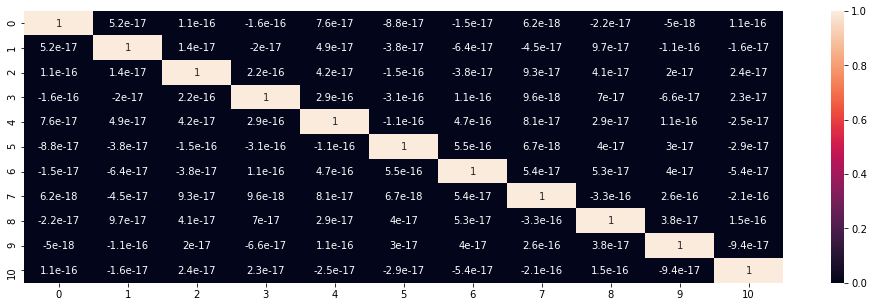

In [68]:
## Note --> PCA will make correlation between features very very very small because make (covariance between features):

plt.figure(figsize = (17,5))
sns.heatmap(df_pca.corr(), annot = True)
plt.show()

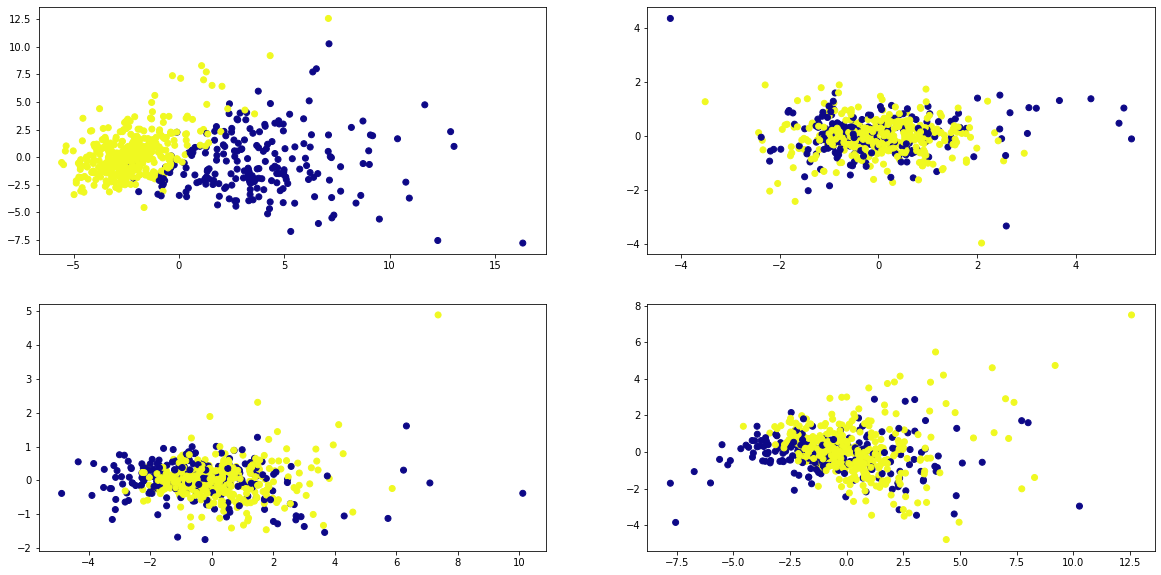

In [69]:
# plot any 2 features after pca to see correlation between them:           # [Features] 
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

plt.sca(ax[0, 0])
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c = y, cmap ='plasma')

plt.sca(ax[0, 1])
plt.scatter(df_pca.iloc[:, 5], df_pca.iloc[:, 7], c = y, cmap ='plasma')

plt.sca(ax[1, 0])
plt.scatter(df_pca.iloc[:, 2], df_pca.iloc[:, 10], c = y, cmap ='plasma')

plt.sca(ax[1, 1])
plt.scatter(df_pca.iloc[:, 1], df_pca.iloc[:, 4], c = y, cmap ='plasma')

In [71]:
# apply PCA data only on 9-D (9 features) 
lr1 = LogisticRegression()
lr1.fit(df_pca.iloc[:, :9], y)
print("9-D Accuracy: ", lr1.score(df_pca.iloc[:, :9], y))


# apply PCA data only on 5-D (9 features) 
lr2 = LogisticRegression()
lr2.fit(df_pca.iloc[:, :5], y)
print("5-D Accuracy: ", lr2.score(df_pca.iloc[:, :5], y))


# apply PCA data only on 2-D (9 features) 
lr3 = LogisticRegression()
lr3.fit(df_pca.iloc[:, :2], y)
print("2-D Accuracy: ", lr3.score(df_pca.iloc[:, :2], y))


9-D Accuracy:  0.9859402460456942
5-D Accuracy:  0.9753954305799648
2-D Accuracy:  0.9560632688927944


# Aother Example

In [72]:
df = pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [73]:
print(df.columns)
print(df.shape)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')
(178, 14)


In [74]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [75]:
# must scaling data before using [PCA]:
z = StandardScaler()
x_scaled = z.fit_transform(x)

In [76]:
# convert 'x_scaled' from [array] to [Dataframe]:
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)        
x_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


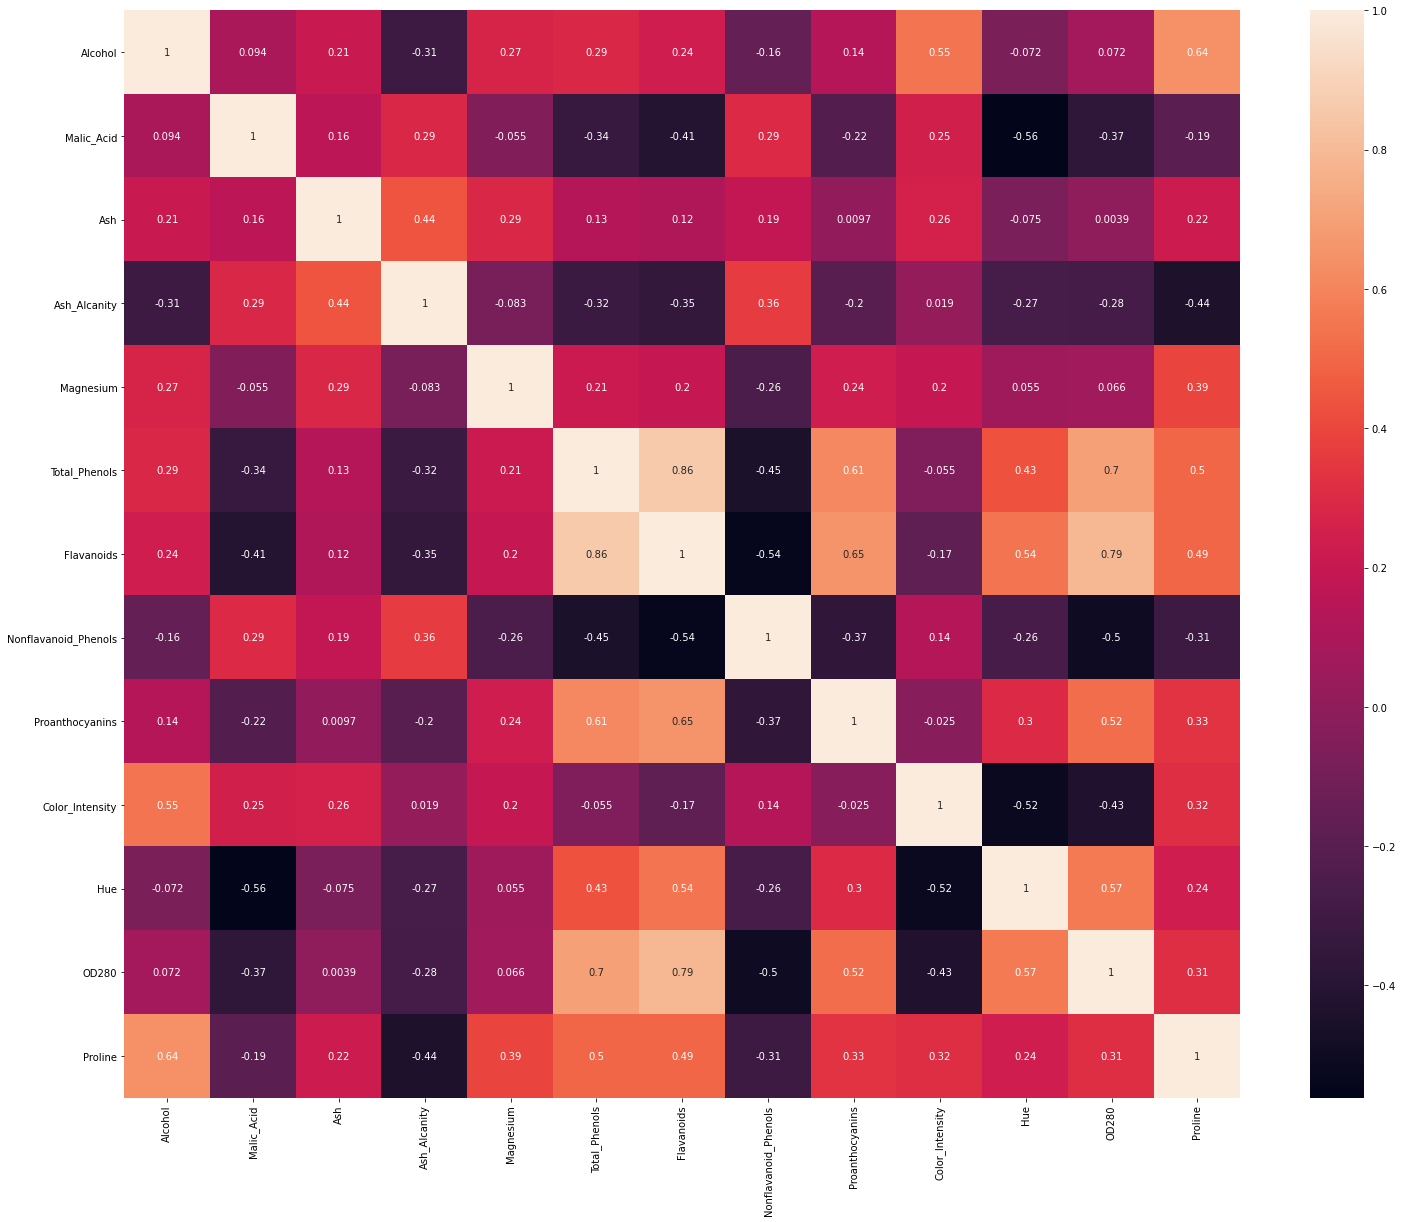

In [77]:
# get correlation before using [PCA], we see some features have high correlation:
plt.figure(figsize = (25,20))
sns.heatmap(x_scaled.corr(), annot = True)
plt.show()

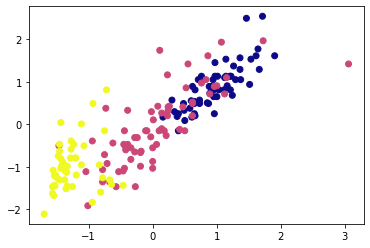

In [78]:
# plot the highest two fetures correlation:
plt.scatter(x_scaled['Flavanoids'], x_scaled['Total_Phenols'], c = y, cmap ='plasma')
plt.show()

In [26]:
pca = PCA()
pca.fit(x_scaled)
pca.explained_variance_ratio_            # here i apply pca on all data without [define --> n_components] to see the best k (n_components) on this data which [variance_ratio <= 0.01] here we see that the [variance_ratio <= 0.01 at k = 13] so we need (n_components = 13)
                                         # [dimensionality reduction] 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [27]:
pcaDF = pd.DataFrame({"k": range(1,14),"variance_ratio" : pca.explained_variance_ratio_,  "cum_variance_ratio": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()               
                            # here when variance_ratio <= 0.01 then [k = 13]
                            # here when cum_variance_ratio = 1 then [k = 13]
                            # so the k = 13, is number of features which we need to be n_components which pca used to Dimensionality Reduction

,k,variance_ratio,cum_variance_ratio
0,1,0.361988,0.361988
1,2,0.192075,0.554063
2,3,0.111236,0.665300
3,4,0.070690,0.735990
4,5,0.065633,0.801623


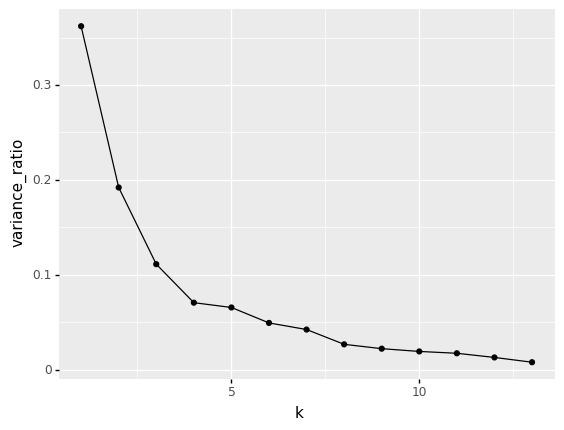

<ggplot: (88807601116)>

In [28]:
# Elbow Method:
(ggplot(pcaDF, aes(x = "k", y = "variance_ratio")) + geom_line() + geom_point())
            # from graph, the first returned k achive that variance_ratio be less than '0.01' is [k = 13]

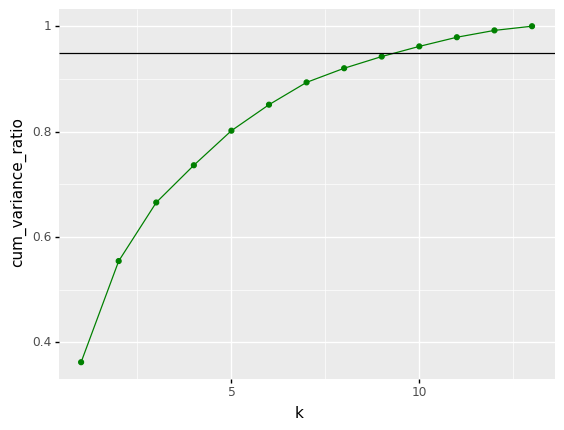

<ggplot: (88802090885)>

In [29]:
# from graph, the returned k achive that cum_variance_ratio be = '1' is [k = 13]
(ggplot(pcaDF, aes(x = "k", y = "cum_variance_ratio")) + geom_line(color = "green") +
 geom_point(color = "green") + geom_hline(yintercept = 0.95))

                        # k=13  

In [30]:
# so we use (n_components = 13):

pca = PCA(n_components = 13)
df_pca = pca.fit_transform(x_scaled)        # fit & transform in one command

In [31]:
# convert 'df_pca' from [array] to [Dataframe]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [32]:
# apply data after pca algorithm to see performance

lr = LogisticRegression()
lr.fit(df_pca, y)
print("Accuracy: ", lr.score(df_pca, y))

Accuracy:  1.0


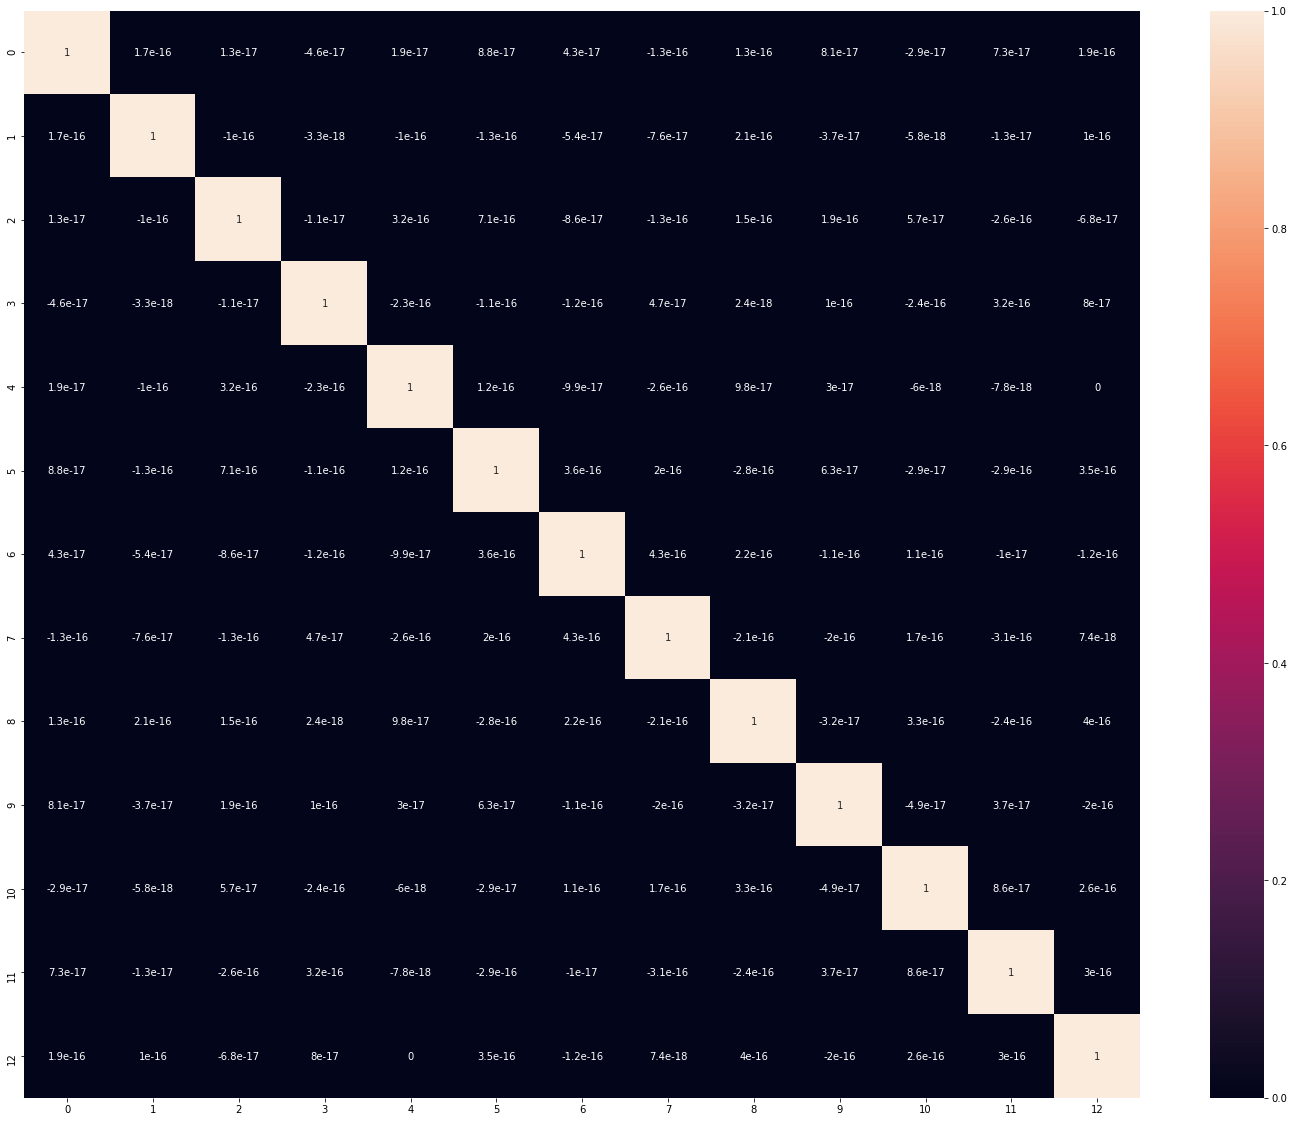

In [33]:
## Note --> PCA will make correlation between features very very very small because make (covariance between features):

plt.figure(figsize = (25,20))
sns.heatmap(df_pca.corr(), annot = True)
plt.show()

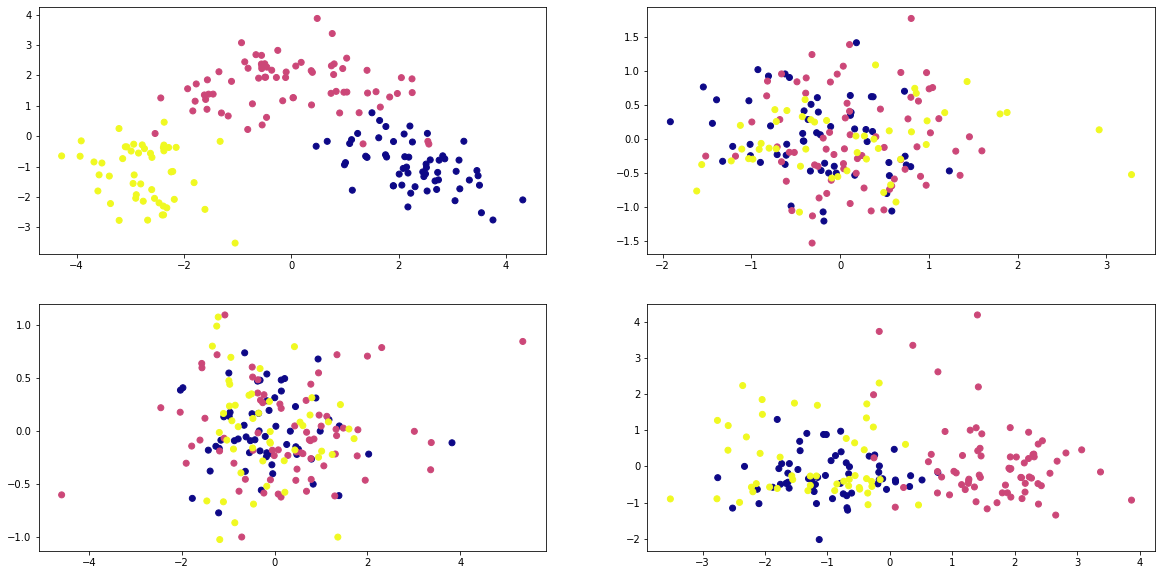

In [34]:
# plot any 2 features after pca to see correlation between them:           # [Features] 
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

plt.sca(ax[0, 0])
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c = y, cmap ='plasma')

plt.sca(ax[0, 1])
plt.scatter(df_pca.iloc[:, 5], df_pca.iloc[:, 7], c = y, cmap ='plasma')

plt.sca(ax[1, 0])
plt.scatter(df_pca.iloc[:, 2], df_pca.iloc[:, 11], c = y, cmap ='plasma')

plt.sca(ax[1, 1])
plt.scatter(df_pca.iloc[:, 1], df_pca.iloc[:, 4], c = y, cmap ='plasma')

In [36]:
# apply PCA data only on 9-D (9 features) 
lr1 = LogisticRegression()
lr1.fit(df_pca.iloc[:, :9], y)
print("9-D Accuracy: ", lr1.score(df_pca.iloc[:, :9], y))


# apply PCA data only on 5-D (9 features) 
lr2 = LogisticRegression()
lr2.fit(df_pca.iloc[:, :5], y)
print("5-D Accuracy: ", lr2.score(df_pca.iloc[:, :5], y))


# apply PCA data only on 2-D (9 features) 
lr3 = LogisticRegression()
lr3.fit(df_pca.iloc[:, :2], y)
print("2-D Accuracy: ", lr3.score(df_pca.iloc[:, :2], y))


9-D Accuracy:  1.0
5-D Accuracy:  0.9943820224719101
2-D Accuracy:  0.9662921348314607


# Another Way -- The best

In [97]:
pca = PCA(n_components = 0.95)
dfpca = pca.fit_transform(x_scaled)
pca.explained_variance_ratio_ 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [98]:
pd.DataFrame(dfpca)

,0,1,2,3,4,5,6,7,8,9
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366
...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490
